In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

In [2]:
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=['user_id','item_id','rating','timestamp'])
movies = pd.read_csv('ml-100k/u.item', sep='|', encoding='latin-1', names=[
    'item_id','title','release_date','video_release_date','IMDb_URL','unknown',
    'Action','Adventure','Animation','Children','Comedy','Crime','Documentary',
    'Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi',
    'Thriller','War','Western'
])
users = pd.read_csv("ml-100k/u.user", sep="|", names=["user_id", "age", "gender", "occupation", "zip_code"])

## 1. EDA

In [3]:
ratings.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
movies.head()

,item_id,title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


checking for nulls

In [6]:
ratings.isna().sum()


user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

In [7]:
movies.isna().sum()

item_id                  0
title                    0
release_date             1
video_release_date    1682
IMDb_URL                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Children                 0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64

In [8]:
movies.drop(columns=['video_release_date','IMDb_URL'] , axis=1, inplace=True)

In [9]:
movies = movies[movies['release_date'].isna() == 0]

In [10]:
movies['title'].unique()

array(['Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)', ...,
       'B. Monkey (1998)', 'You So Crazy (1994)',
       'Scream of Stone (Schrei aus Stein) (1991)'],
      shape=(1663,), dtype=object)

In [11]:
users.isna().sum()

user_id       0
age           0
gender        0
occupation    0
zip_code      0
dtype: int64

In [12]:
n_ratings = len(ratings)
n_movies = ratings['item_id'].nunique()
n_users = users['user_id'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 100000
Number of unique movieId's: 1682
Number of unique users: 943
Average number of ratings per user: 106.04
Average number of ratings per movie: 59.45


In [13]:
ratings['rating'].value_counts()

rating
4    34174
3    27145
5    21201
2    11370
1     6110
Name: count, dtype: int64

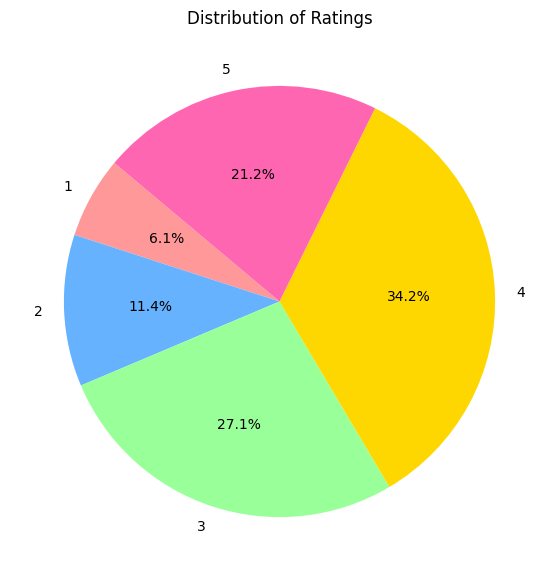

In [14]:
rating_counts = ratings['rating'].value_counts().sort_index()

plt.figure(figsize=(7,7))
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFD700', '#FF66B2']
plt.pie(
    rating_counts,
    labels=rating_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors[:len(rating_counts)]
)
plt.title('Distribution of Ratings')
plt.show()

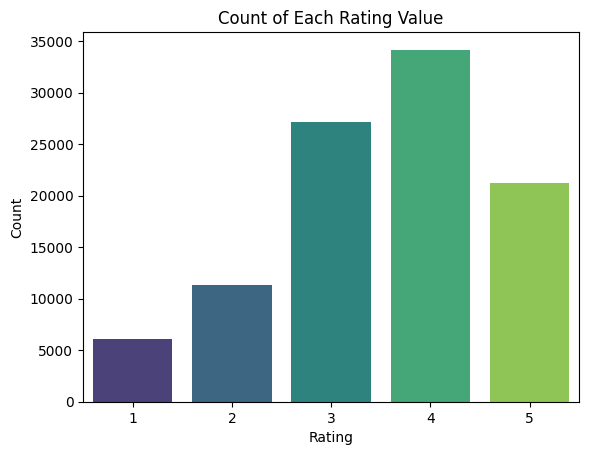

In [15]:
sns.countplot(data=ratings, x='rating', palette='viridis')

plt.title('Count of Each Rating Value')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

each user rated how many movies ? 

In [16]:
nu_rating_per_user = ratings.groupby('user_id')['rating'].count()

In [17]:
print("min ratings per user : ", nu_rating_per_user.values.min())
print("max ratings per user : ", nu_rating_per_user.values.max())

min ratings per user :  20
max ratings per user :  737


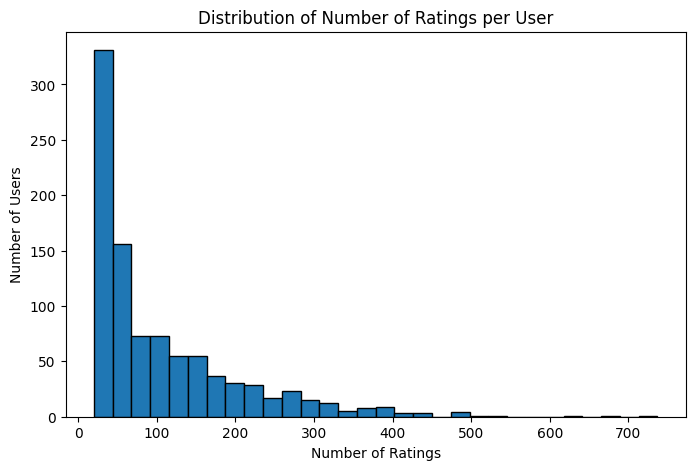

In [18]:
plt.figure(figsize=(8,5))
plt.hist(nu_rating_per_user, bins=30, edgecolor='black')
plt.title('Distribution of Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()

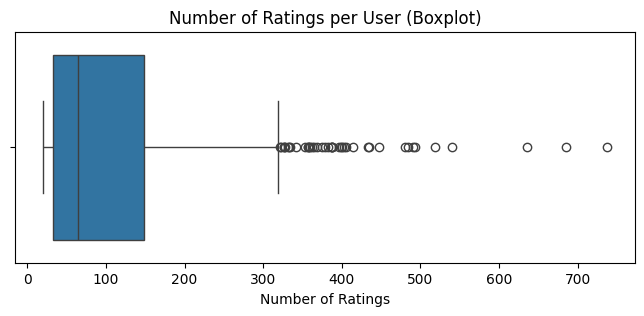

In [19]:
plt.figure(figsize=(8,3))
sns.boxplot(x=nu_rating_per_user)
plt.title('Number of Ratings per User (Boxplot)')
plt.xlabel('Number of Ratings')
plt.show()

some outliers after 320 ratings per user , i will keep them for now as part of real data

In [20]:
nu_rating_per_movie = ratings.groupby('item_id')['rating'].count()
nu_rating_per_movie

item_id
1       452
2       131
3        90
4       209
5        86
       ... 
1678      1
1679      1
1680      1
1681      1
1682      1
Name: rating, Length: 1682, dtype: int64

top 10 rated movies :

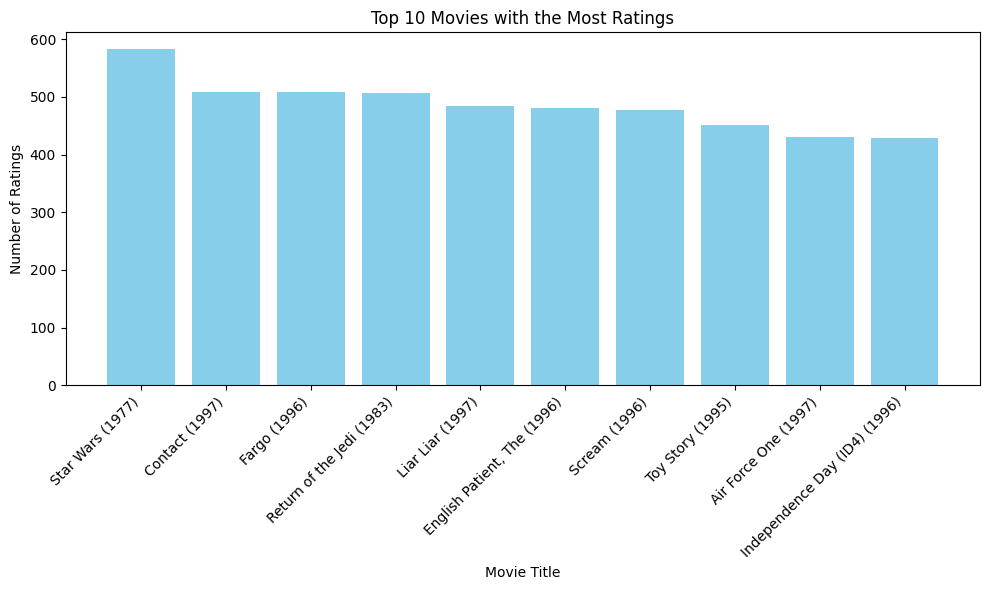

In [21]:
top_10_movies = nu_rating_per_movie.sort_values(ascending=False).head(10)

top_10_movies_titles = movies.loc[movies['item_id'].isin(top_10_movies.index), ['item_id', 'title']]

top_10_movies_titles = top_10_movies_titles.set_index('item_id').loc[top_10_movies.index]

plt.figure(figsize=(10,6))
plt.bar(top_10_movies_titles['title'], top_10_movies.values, color='skyblue')

plt.title('Top 10 Movies with the Most Ratings')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

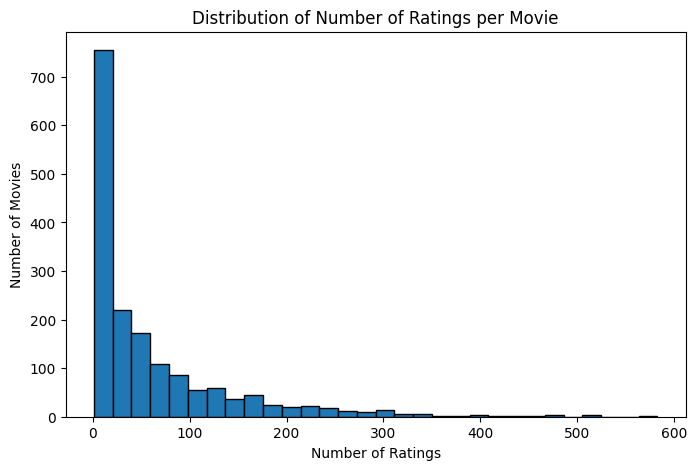

In [22]:
plt.figure(figsize=(8,5))
plt.hist(nu_rating_per_movie, bins=30, edgecolor='black')
plt.title('Distribution of Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.show()

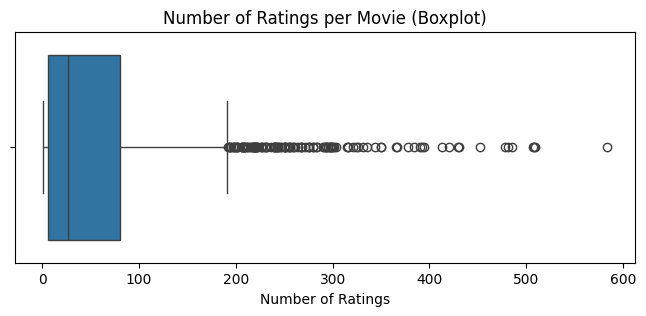

In [23]:
plt.figure(figsize=(8,3))
sns.boxplot(x=nu_rating_per_movie)
plt.title('Number of Ratings per Movie (Boxplot)')
plt.xlabel('Number of Ratings')
plt.show()

there are alot of outliers here

In [24]:
(nu_rating_per_movie.values > 200 ).sum()*100 / n_users

np.float64(12.407211028632025)

12% of ratings are outliers

In [25]:
def check_outliers(data,col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    return data[data[col]<lower_bound | data[col] > upper_bound ]


In [26]:
mean_ratings_per_movie = ratings.groupby('item_id')['rating'].mean()
mean_ratings_per_movie

item_id
1       3.878319
2       3.206107
3       3.033333
4       3.550239
5       3.302326
          ...   
1678    1.000000
1679    3.000000
1680    2.000000
1681    3.000000
1682    3.000000
Name: rating, Length: 1682, dtype: float64

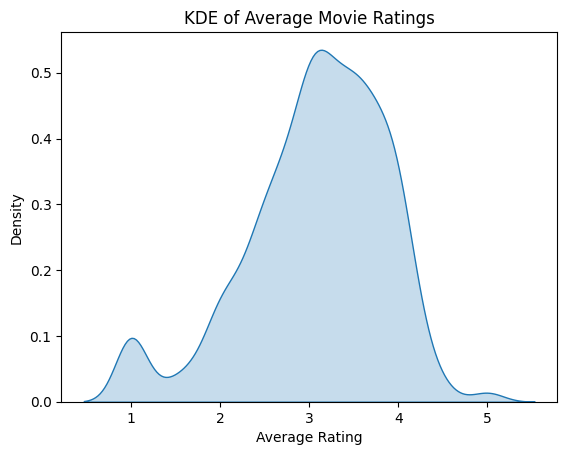

In [27]:
sns.kdeplot(mean_ratings_per_movie, fill=True)
plt.title('KDE of Average Movie Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Density')
plt.show()

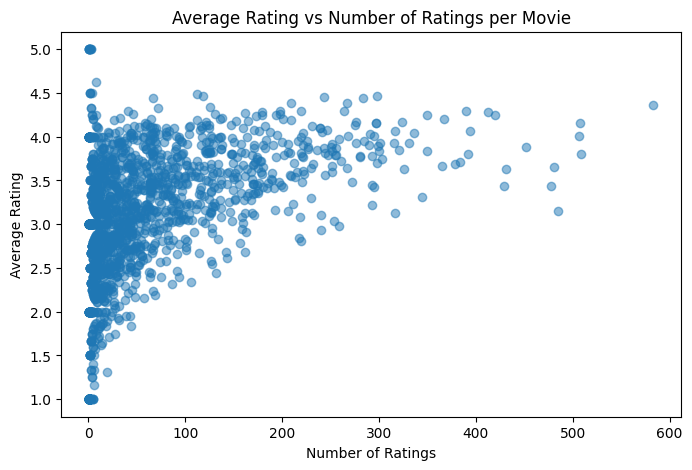

In [28]:
mean_ratings_per_movie = ratings.groupby('item_id')['rating'].mean()
num_ratings_per_movie = ratings.groupby('item_id')['rating'].count()

# دمجهم في DataFrame واحد
movie_stats = pd.DataFrame({
    'mean_rating': mean_ratings_per_movie,
    'num_ratings': num_ratings_per_movie
}).reset_index()

# الرسم الصحيح
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(movie_stats['num_ratings'], movie_stats['mean_rating'], alpha=0.5)
plt.title('Average Rating vs Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.show()

In [29]:
mean_ratings_per_movie.sort_values()

item_id
1671    1.0
1678    1.0
1559    1.0
1548    1.0
1557    1.0
       ... 
1500    5.0
1467    5.0
1653    5.0
1122    5.0
1599    5.0
Name: rating, Length: 1682, dtype: float64

In [30]:
min_avg_rate = mean_ratings_per_movie.argmin()
movies[movies['item_id'] == min_avg_rate+1]

,item_id,title,release_date,unknown,Action,Adventure,Animation,Children,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
313,314,3 Ninjas: High Noon At Mega Mountain (1998),01-Jan-1997,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
mean_ratings_per_movie[mean_ratings_per_movie.values == 5.0]

item_id
814     5.0
1122    5.0
1189    5.0
1201    5.0
1293    5.0
1467    5.0
1500    5.0
1536    5.0
1599    5.0
1653    5.0
Name: rating, dtype: float64

In [32]:
highest_rated = mean_ratings_per_movie.idxmax()
movies[movies['item_id'] == highest_rated]

,item_id,title,release_date,unknown,Action,Adventure,Animation,Children,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
813,814,"Great Day in Harlem, A (1994)",01-Jan-1994,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
genre_counts = movies.iloc[:, 5:-1].sum().sort_values(ascending=False)
print(genre_counts)

Drama          725
Comedy         505
Thriller       251
Romance        247
Adventure      135
Children       122
Crime          109
Sci-Fi         101
Horror          92
War             71
Mystery         61
Musical         56
Documentary     50
Animation       42
Film-Noir       24
Fantasy         22
dtype: int64


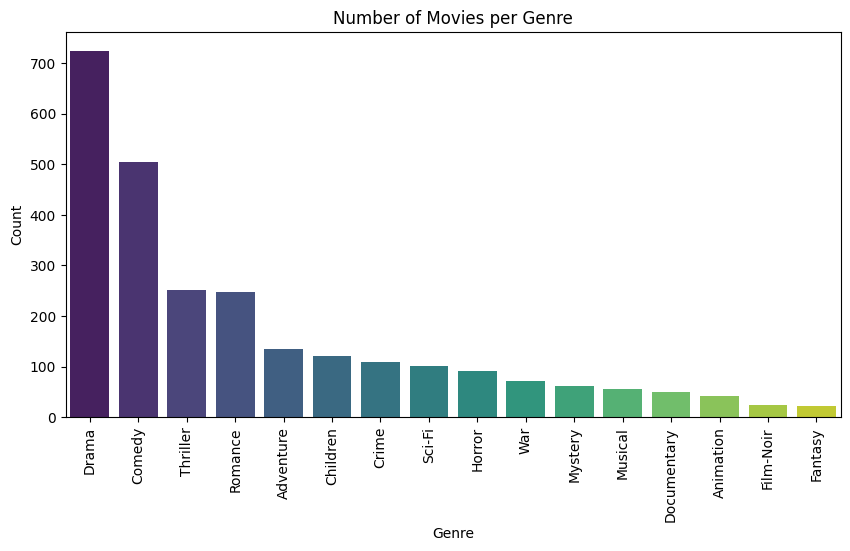

In [34]:
genre_frequency_df = pd.DataFrame([genre_counts]).T.reset_index()
genre_frequency_df.columns = ['genre', 'count']

plt.figure(figsize=(10,5))
sns.barplot(
    x='genre',
    y='count',
    data=genre_frequency_df.sort_values(by='count', ascending=False),
    palette='viridis'  
)
plt.title('Number of Movies per Genre')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.xlabel('Genre')
plt.show()

## 2.Preprocessing

custom threshold 0.75

In [35]:
movies = pd.merge(movies,num_ratings_per_movie,on='item_id')

In [36]:
movies_ratings_merged = pd.merge(ratings[['user_id','item_id','rating']],movies[['title','item_id','rating']],on='item_id',how='inner')
movies_ratings_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99991 entries, 0 to 99990
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   99991 non-null  int64 
 1   item_id   99991 non-null  int64 
 2   rating_x  99991 non-null  int64 
 3   title     99991 non-null  object
 4   rating_y  99991 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.8+ MB


In [37]:
threshold_users = np.percentile(nu_rating_per_user,75)
threshold_users

np.float64(148.0)

In [38]:
mean_u = nu_rating_per_user.mean()
std_u = nu_rating_per_user.std()
#threshold_users = mean_u - std_u
threshold_users

np.float64(148.0)

In [39]:
movies_ratings_merged = movies_ratings_merged[movies_ratings_merged['rating_y']>=threshold_users]
movies_ratings_merged

,user_id,item_id,rating_x,title,rating_y
1,186,302,3,L.A. Confidential (1997),297
5,298,474,4,Dr. Strangelove or: How I Learned to Stop Worr...,194
6,115,265,2,"Hunt for Red October, The (1990)",227
8,305,451,3,Grease (1978),170
9,6,86,3,"Remains of the Day, The (1993)",150
...,...,...,...,...,...
99979,421,498,4,"African Queen, The (1951)",152
99984,913,209,2,This Is Spinal Tap (1984),191
99986,880,476,3,"First Wives Club, The (1996)",160
99987,716,204,5,Back to the Future (1985),350


keep only active users

In [40]:
users = pd.merge(users,nu_rating_per_user,on='user_id')

In [41]:
users

,user_id,age,gender,occupation,zip_code,rating
0,1,24,M,technician,85711,272
1,2,53,F,other,94043,62
2,3,23,M,writer,32067,54
3,4,24,M,technician,43537,24
4,5,33,F,other,15213,175
...,...,...,...,...,...,...
938,939,26,F,student,33319,49
939,940,32,M,administrator,02215,107
940,941,20,M,student,97229,22
941,942,48,F,librarian,78209,79


In [42]:
data_merged = pd.merge(movies_ratings_merged[['user_id','item_id','rating_x','title','rating_y']],users[['user_id','rating']],on='user_id',how='inner')
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49315 entries, 0 to 49314
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   49315 non-null  int64 
 1   item_id   49315 non-null  int64 
 2   rating_x  49315 non-null  int64 
 3   title     49315 non-null  object
 4   rating_y  49315 non-null  int64 
 5   rating    49315 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 2.3+ MB


In [43]:
data_merged

,user_id,item_id,rating_x,title,rating_y,rating
0,186,302,3,L.A. Confidential (1997),297,92
1,298,474,4,Dr. Strangelove or: How I Learned to Stop Worr...,194,127
2,115,265,2,"Hunt for Red October, The (1990)",227,92
3,305,451,3,Grease (1978),170,222
4,6,86,3,"Remains of the Day, The (1993)",150,211
...,...,...,...,...,...,...
49310,421,498,4,"African Queen, The (1951)",152,62
49311,913,209,2,This Is Spinal Tap (1984),191,132
49312,880,476,3,"First Wives Club, The (1996)",160,368
49313,716,204,5,Back to the Future (1985),350,269


In [44]:
threshold_movies = np.percentile(nu_rating_per_movie,75)
threshold_movies

np.float64(80.0)

In [45]:
data_merged = data_merged[data_merged['rating']>=threshold_movies][['user_id','item_id','rating_x','title']]
data_merged = data_merged.rename(columns={'rating_x':'rating'})
data_merged

,user_id,item_id,rating,title
0,186,302,3,L.A. Confidential (1997)
1,298,474,4,Dr. Strangelove or: How I Learned to Stop Worr...
2,115,265,2,"Hunt for Red October, The (1990)"
3,305,451,3,Grease (1978)
4,6,86,3,"Remains of the Day, The (1993)"
...,...,...,...,...
49308,913,690,3,Seven Years in Tibet (1997)
49309,660,229,2,Star Trek III: The Search for Spock (1984)
49311,913,209,2,This Is Spinal Tap (1984)
49312,880,476,3,"First Wives Club, The (1996)"


## Techniqies in recommendation :

### 1. Simple method 

now we have an issue , some movies may have 2 or ratings , so we can't take the avg as it will be misleading due to no of ratings is very low

let's try ***Bayesian Average***


🧮 Formula
Weighted Rating

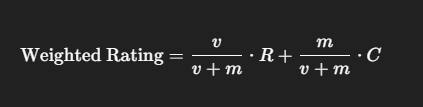

Where:

R = the average rating for the movie

v = the number of ratings the movie received

C = the mean rating across all movies (the global average)

m = the minimum number of ratings required to give a reliable estimate (a tuning parameter)

In [46]:
movie_stats = data_merged.groupby('item_id')['rating'].agg(['count', 'mean']).reset_index()
movie_stats.head()

,item_id,count,mean
0,1,286,3.912587
1,4,190,3.584211
2,7,259,3.841699
3,8,186,4.000000
4,9,183,3.896175


In [47]:
C = data_merged['rating'].mean()
m = 50
movie_stats['bayesian_avg'] = (movie_stats['count'] / (movie_stats['count'] + m ) * movie_stats['mean'] + (m / (m + movie_stats['count'])) * C )
top_movies = movie_stats.sort_values('bayesian_avg', ascending=False).head(10)
top_movies

,item_id,count,mean,bayesian_avg
175,483,191,4.502618,4.348418
139,318,226,4.464602,4.336843
21,64,227,4.444934,4.321187
17,50,360,4.391667,4.314558
6,12,214,4.383178,4.265033
45,127,260,4.350000,4.254738
192,603,161,4.403727,4.251037
36,98,294,4.316327,4.235374
64,174,328,4.274390,4.206267
48,134,164,4.335366,4.200789


- IMDB-style weighted rating

In [48]:
C = movie_stats['mean'].mean()
M = movie_stats['count'].quantile(0.90)

def weighted_rating(x, M=M, C=C):
    v = x['count']
    R = x['mean']
    
    return (v/(v+M) * R) + (M/(M+v) * C)
movie_stats['imdb_score'] = weighted_rating(movie_stats)

In [49]:
movie_stats

,item_id,count,mean,bayesian_avg,imdb_score
0,1,286,3.912587,3.889788,3.817273
1,4,190,3.584211,3.620703,3.653261
2,7,259,3.841699,3.828378,3.775836
3,8,186,4.000000,3.949020,3.832838
4,9,183,3.896175,3.866819,3.787401
...,...,...,...,...,...
205,748,151,2.993377,3.183924,3.435429
206,751,97,3.443299,3.550808,3.632146
207,763,112,3.455357,3.549190,3.628008
208,845,126,3.365079,3.477095,3.590953


In [50]:
movie_stats = movie_stats.merge(movies[['item_id','title']] , on='item_id')
movie_stats

,item_id,count,mean,bayesian_avg,imdb_score,title
0,1,286,3.912587,3.889788,3.817273,Toy Story (1995)
1,4,190,3.584211,3.620703,3.653261,Get Shorty (1995)
2,7,259,3.841699,3.828378,3.775836,Twelve Monkeys (1995)
3,8,186,4.000000,3.949020,3.832838,Babe (1995)
4,9,183,3.896175,3.866819,3.787401,Dead Man Walking (1995)
...,...,...,...,...,...,...
205,748,151,2.993377,3.183924,3.435429,"Saint, The (1997)"
206,751,97,3.443299,3.550808,3.632146,Tomorrow Never Dies (1997)
207,763,112,3.455357,3.549190,3.628008,Happy Gilmore (1996)
208,845,126,3.365079,3.477095,3.590953,That Thing You Do! (1996)


In [51]:
movie_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   item_id       210 non-null    int64  
 1   count         210 non-null    int64  
 2   mean          210 non-null    float64
 3   bayesian_avg  210 non-null    float64
 4   imdb_score    210 non-null    float64
 5   title         210 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 10.0+ KB


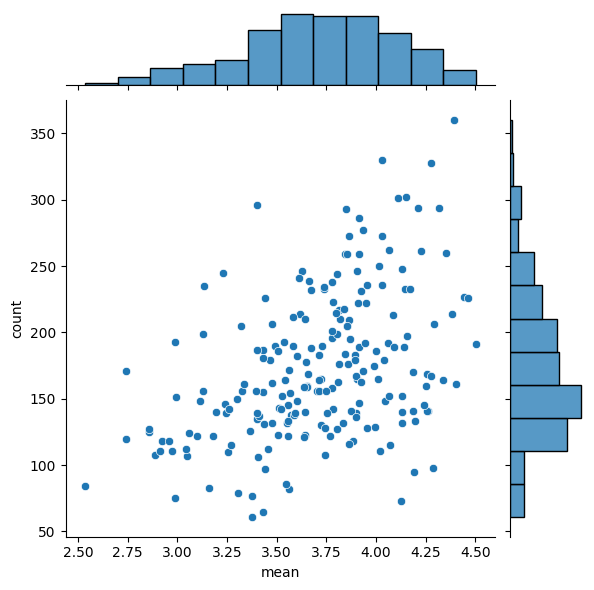

In [52]:
sns.jointplot(x='mean', y='count', data=movie_stats)

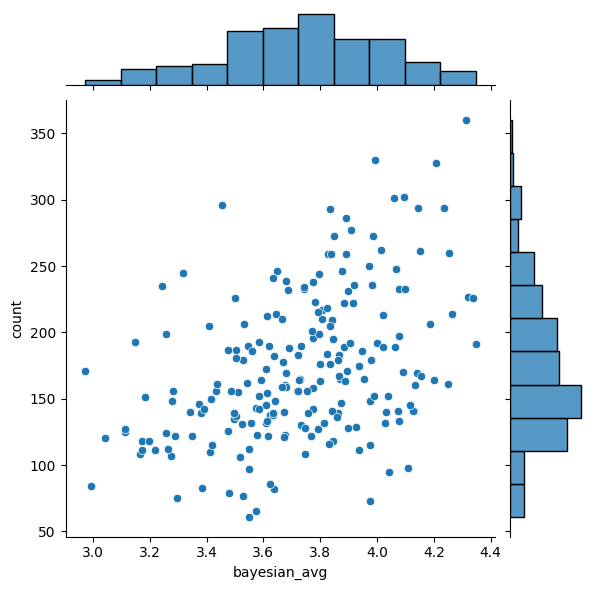

In [53]:
sns.jointplot(x='bayesian_avg', y='count', data=movie_stats)

In [54]:
top_movies = movie_stats.sort_values('bayesian_avg', ascending=False).head(10)
top_movies

,item_id,count,mean,bayesian_avg,imdb_score,title
175,483,191,4.502618,4.348418,4.054329,Casablanca (1942)
139,318,226,4.464602,4.336843,4.069362,Schindler's List (1993)
21,64,227,4.444934,4.321187,4.060762,"Shawshank Redemption, The (1994)"
17,50,360,4.391667,4.314558,4.113416,Star Wars (1977)
6,12,214,4.383178,4.265033,4.021192,"Usual Suspects, The (1995)"
45,127,260,4.350000,4.254738,4.037046,"Godfather, The (1972)"
192,603,161,4.403727,4.251037,3.982202,Rear Window (1954)
36,98,294,4.316327,4.235374,4.038416,"Silence of the Lambs, The (1991)"
64,174,328,4.274390,4.206267,4.030917,Raiders of the Lost Ark (1981)
48,134,164,4.335366,4.200789,3.957954,Citizen Kane (1941)


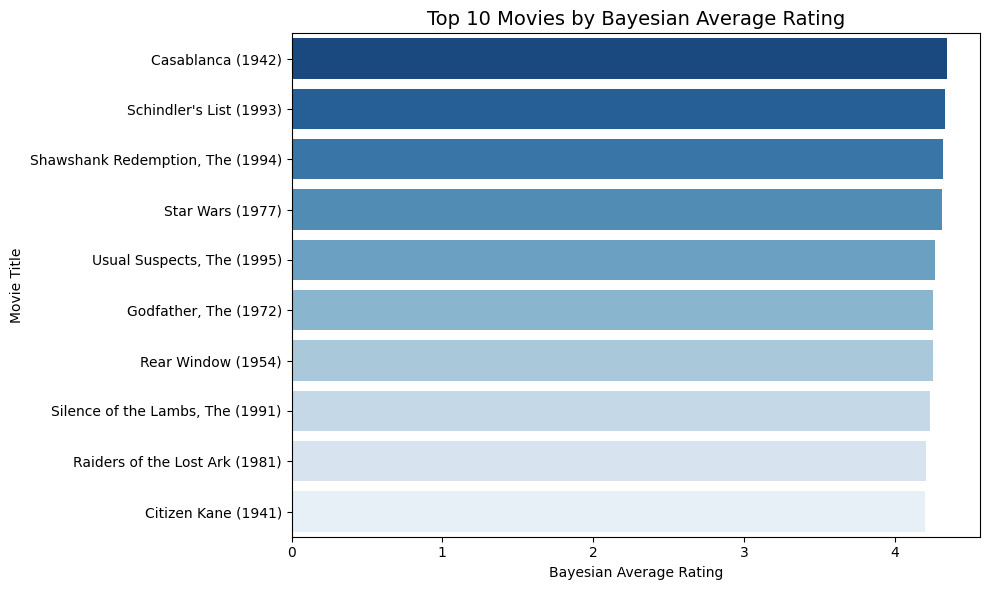

In [55]:

plt.figure(figsize=(10,6))
sns.barplot(x='bayesian_avg', y='title', data=top_movies, palette='Blues_r')
plt.title('Top 10 Movies by Bayesian Average Rating', fontsize=14)
plt.xlabel('Bayesian Average Rating')
plt.ylabel('Movie Title')
plt.tight_layout()
plt.show()

In [56]:
top_movies = movie_stats.sort_values('imdb_score', ascending=False).head(10)
top_movies

,item_id,count,mean,bayesian_avg,imdb_score,title
17,50,360,4.391667,4.314558,4.113416,Star Wars (1977)
139,318,226,4.464602,4.336843,4.069362,Schindler's List (1993)
21,64,227,4.444934,4.321187,4.060762,"Shawshank Redemption, The (1994)"
175,483,191,4.502618,4.348418,4.054329,Casablanca (1942)
36,98,294,4.316327,4.235374,4.038416,"Silence of the Lambs, The (1991)"
45,127,260,4.350000,4.254738,4.037046,"Godfather, The (1972)"
64,174,328,4.274390,4.206267,4.030917,Raiders of the Lost Ark (1981)
6,12,214,4.383178,4.265033,4.021192,"Usual Suspects, The (1995)"
192,603,161,4.403727,4.251037,3.982202,Rear Window (1954)
62,172,294,4.210884,4.145258,3.981030,"Empire Strikes Back, The (1980)"


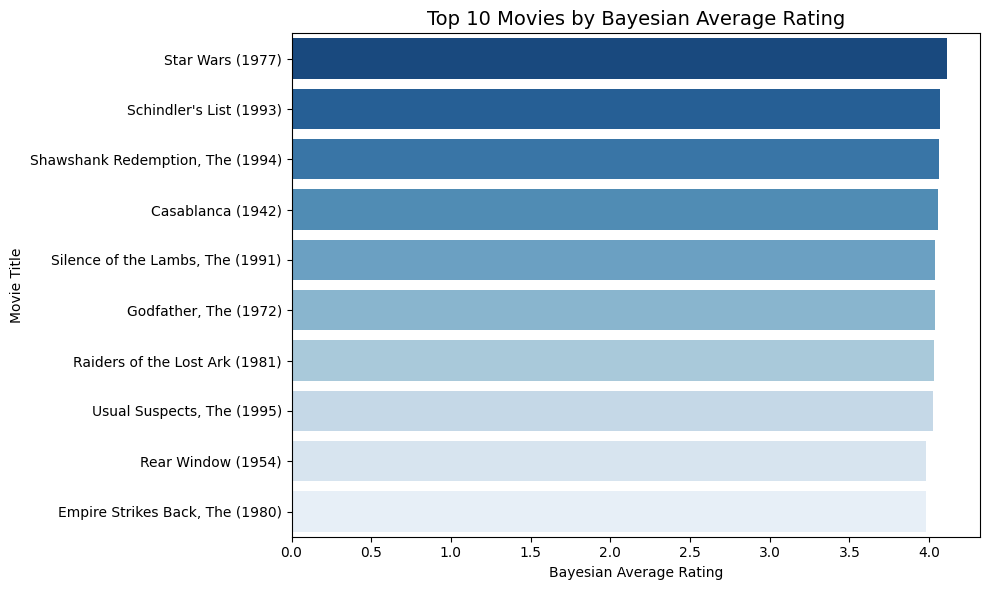

In [57]:
plt.figure(figsize=(10,6))
sns.barplot(x='imdb_score', y='title', data=top_movies, palette='Blues_r')
plt.title('Top 10 Movies by Bayesian Average Rating', fontsize=14)
plt.xlabel('Bayesian Average Rating')
plt.ylabel('Movie Title')
plt.tight_layout()
plt.show()

we can now recommend these movies to users with no history

### 2.Collaborative Filtering

first we have to get the relation between user and all movies 
- user-item matrix

In [58]:
utitlity_matrix = data_merged.pivot(index = 'user_id' , columns='item_id' , values = 'rating')
utitlity_matrix.fillna(0,inplace=True)

In [59]:
utitlity_matrix

item_id,1,4,7,8,9,11,12,13,14,15,...,690,692,732,739,742,748,751,763,845,1028
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,1.0,5.0,2.0,5.0,5.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,2.0,4.0,4.0,0.0,4.0,2.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,5.0,5.0,5.0,5.0,3.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,4.0,4.0,4.0,0.0,4.0,4.0,5.0,3.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,2.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
936,4.0,0.0,4.0,0.0,4.0,0.0,0.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0
938,4.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,4.0,1.0,5.0


splitting the data into train and test , so we can evaluaate it

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
train_df, test_df = train_test_split(data_merged, test_size=0.2, random_state=42)

In [62]:
train_matrix = train_df.pivot(index = 'user_id' , columns='item_id' , values = 'rating')
train_matrix.fillna(0,inplace=True)

test_matrix = test_df.pivot(index = 'user_id' , columns='item_id' , values = 'rating')

test_matrix.fillna(0,inplace=True)

In [63]:
train_matrix

item_id,1,4,7,8,9,11,12,13,14,15,...,690,692,732,739,742,748,751,763,845,1028
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,1.0,0.0,2.0,5.0,5.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,2.0,4.0,4.0,0.0,4.0,2.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,5.0,5.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,4.0,0.0,4.0,0.0,4.0,4.0,5.0,3.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
936,4.0,0.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0
938,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,4.0,1.0,5.0


In [64]:
test_matrix

item_id,1,4,7,8,9,11,12,13,14,15,...,690,692,732,739,742,748,751,763,845,1028
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
938,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
# calc sparsity : 

total_cells = utitlity_matrix.shape[0] * utitlity_matrix.shape[1]
non_zero_cells = np.count_nonzero(utitlity_matrix)
sparsity = (1 - (non_zero_cells / total_cells)) * 100

print(f"Sparsity: {sparsity:.2f}%")

Sparsity: 57.77%


- The user–item utility matrix exhibits a high sparsity level of approximately 70%, 
- which indicates that most users have rated only a small fraction of the available movies.

I will use CSR_matrix to keep only non-zero ratings which will save memory

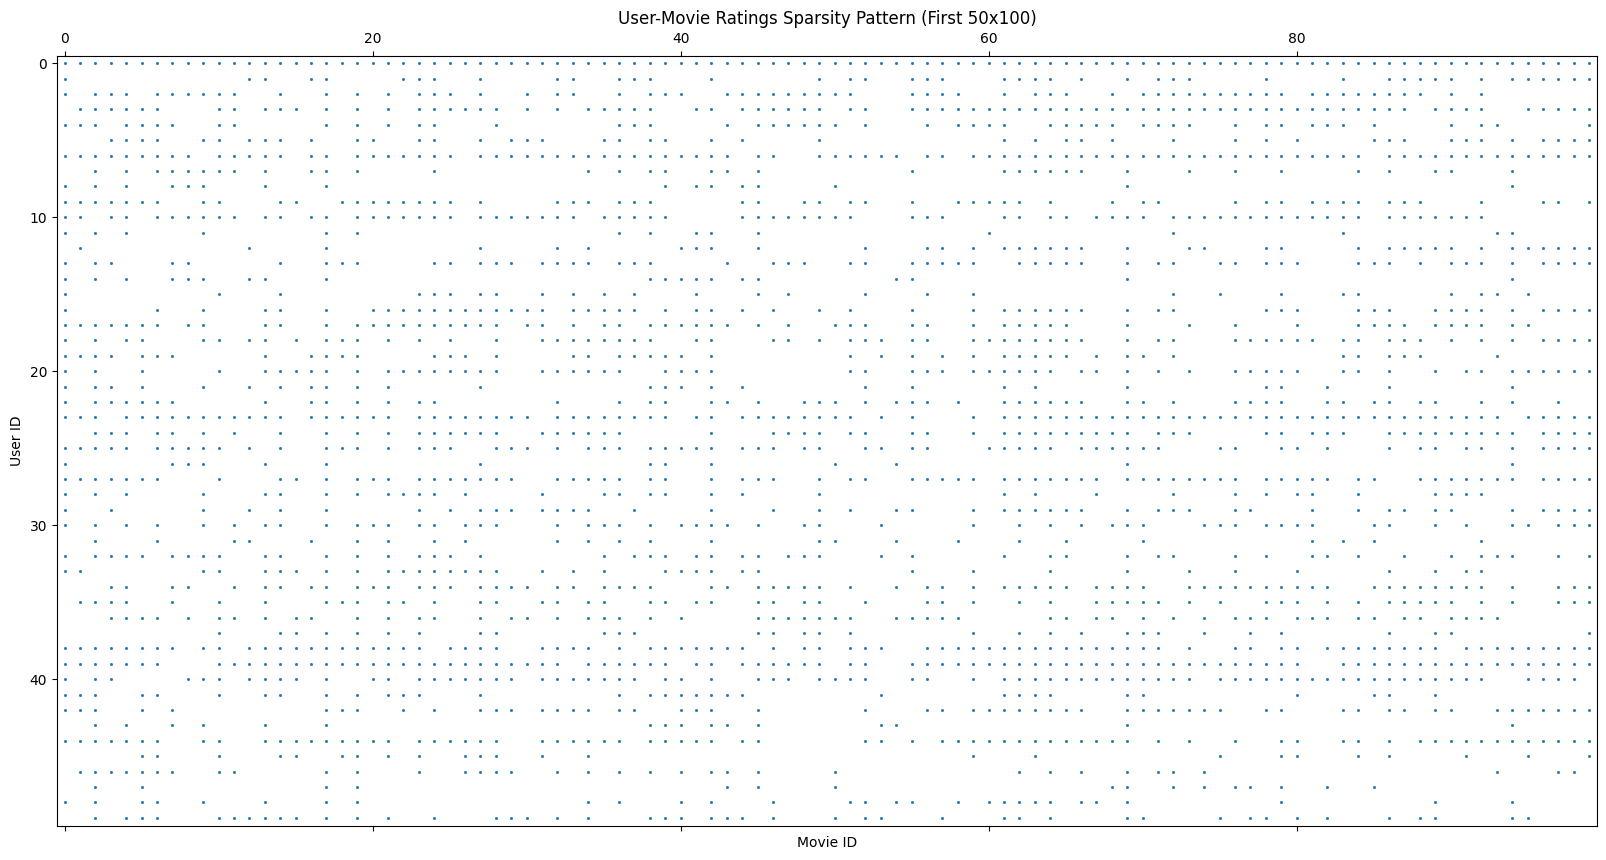

In [66]:
matrix = np.array(utitlity_matrix)

plt.figure(figsize=(30,10))
plt.spy(matrix[:50, :100], markersize=1)
plt.title('User-Movie Ratings Sparsity Pattern (First 50x100)')
plt.xlabel('Movie ID')
plt.ylabel('User ID')
plt.show()

In [67]:
from scipy.sparse import csr_matrix
X_train = csr_matrix(train_matrix.values)
X_test = csr_matrix(test_matrix.values)
print(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 29160 stored elements and shape (411, 210)>
  Coords	Values
  (0, 0)	5.0
  (0, 1)	3.0
  (0, 2)	4.0
  (0, 3)	1.0
  (0, 5)	2.0
  (0, 6)	5.0
  (0, 7)	5.0
  (0, 8)	5.0
  (0, 9)	5.0
  (0, 11)	4.0
  (0, 12)	3.0
  (0, 13)	4.0
  (0, 14)	4.0
  (0, 16)	5.0
  (0, 17)	5.0
  (0, 18)	5.0
  (0, 19)	4.0
  (0, 20)	4.0
  (0, 22)	4.0
  (0, 23)	3.0
  (0, 24)	3.0
  (0, 25)	3.0
  (0, 26)	4.0
  (0, 27)	4.0
  (0, 28)	5.0
  :	:
  (410, 104)	5.0
  (410, 120)	3.0
  (410, 125)	2.0
  (410, 139)	3.0
  (410, 150)	4.0
  (410, 151)	4.0
  (410, 152)	2.0
  (410, 153)	2.0
  (410, 154)	4.0
  (410, 155)	4.0
  (410, 159)	3.0
  (410, 160)	4.0
  (410, 161)	4.0
  (410, 165)	2.0
  (410, 171)	5.0
  (410, 178)	5.0
  (410, 184)	4.0
  (410, 186)	4.0
  (410, 187)	3.0
  (410, 195)	4.0
  (410, 199)	4.0
  (410, 202)	4.0
  (410, 203)	4.0
  (410, 207)	4.0
  (410, 209)	2.0


as one function : 

mapping user_id and movie_id

In [68]:
def create_X(df):
    M = df['user_id'].nunique()
    N = df['item_id'].nunique()

    user_mapper = dict(zip(np.unique(df["user_id"]), list(range(M))))
    movie_mapper = dict(zip(np.unique(df["item_id"]), list(range(N))))
    

    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["user_id"])))
    movie_inv_mapper = dict(zip(list(range(N)), np.unique(df["item_id"])))

    user_index = [user_mapper[i] for i in df['user_id']]
    item_index = [movie_mapper[i] for i in df['item_id']]

    X = csr_matrix((df["rating"], (user_index, item_index)), shape=(M, N))

    return  X,user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

In [69]:
X,user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_X(data_merged)

this step is very essetial : 
 - we will compute the similarities between users
 - get most similier users to the targeted user
 - get best movies users similar to the targeted user
 - filter movies already been watched
 - recommend the rest

In [70]:
from sklearn.metrics.pairwise import cosine_similarity

user_similarity = cosine_similarity(X_train)
print(user_similarity)

[[1.         0.51706528 0.42770125 ... 0.24674598 0.39787004 0.49069055]
 [0.51706528 1.         0.32590902 ... 0.22686789 0.27831439 0.3469815 ]
 [0.42770125 0.32590902 1.         ... 0.17722887 0.40217717 0.33555365]
 ...
 [0.24674598 0.22686789 0.17722887 ... 1.         0.24375923 0.20004322]
 [0.39787004 0.27831439 0.40217717 ... 0.24375923 1.         0.28976926]
 [0.49069055 0.3469815  0.33555365 ... 0.20004322 0.28976926 1.        ]]


to apply user_bases CF :
 - we have to group similar users together
 - we will use cosine_matrix to cluster them 
 

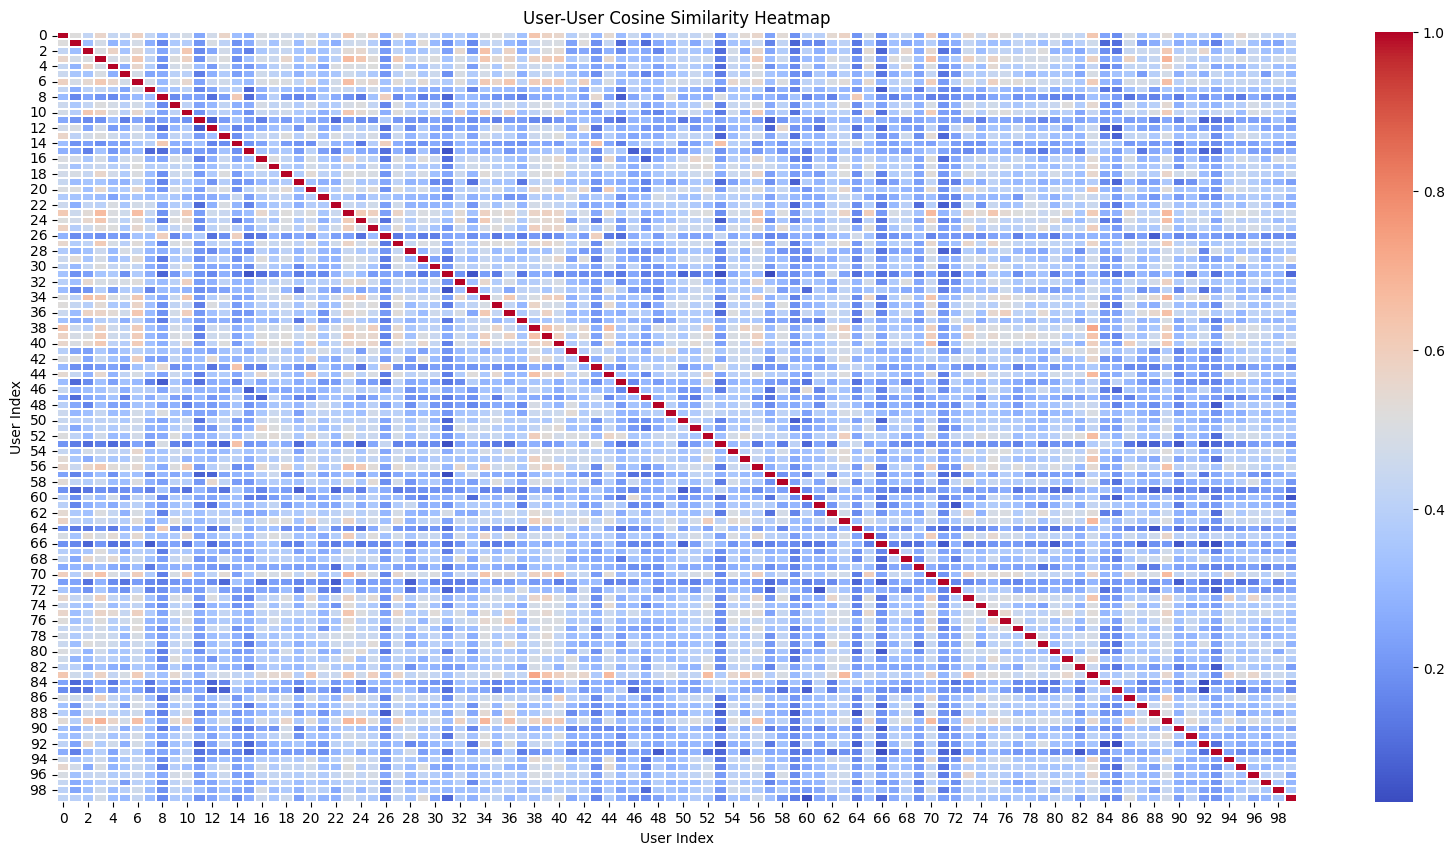

In [71]:
plt.figure(figsize=(20, 10))
sns.heatmap(user_similarity[:100, :100], cmap='coolwarm', linewidths=0.1)

plt.title('User-User Cosine Similarity Heatmap')
plt.xlabel('User Index')
plt.ylabel('User Index')
plt.show()

In [72]:
def get_similar_users(user_id, user_mapper,user_inv_mapper,user_similarity,k):
    user_indx = user_mapper[user_id]
    sim_row = list(enumerate(user_similarity[user_indx]))
    sim_row = sorted(sim_row, key=lambda x: x[1], reverse=True)

    top_k = sim_row[1:k+1]
    similar_user_indices = [i[0] for i in top_k] 
    return similar_user_indices

In [73]:
similar_users = get_similar_users(1, user_mapper, user_inv_mapper, user_similarity, k=5)
print(similar_users)

[141, 38, 352, 397, 83]


now we have users similar to other user: 
 1. get movies that similar users rated highly
 2. filter movies ur client already watched 
 3. recommend the rest

In [74]:
'''
def recommend_movies(user_id, X, user_similarity, user_mapper, user_inv_mapper, movie_inv_mapper, k=5, n_recommendations=5):
    user_ind = user_mapper[user_id]
    sim_scores = user_similarity[user_ind]
    
    weighted_sum = sim_scores @ X.toarray()
    normalization = np.array([np.abs(sim_scores).sum()] * X.shape[1])
    
    predicted_ratings = weighted_sum / normalization
    
    user_ratings = X[user_ind].toarray().flatten()
    predicted_ratings[user_ratings > 0] = 0
    print(predicted_ratings)
    
    top_movies_idx = np.argsort(predicted_ratings)[::-1][:n_recommendations]
    recommended_movie_ids = [movie_inv_mapper[i] for i in top_movies_idx]
    
    return recommended_movie_ids
'''

'\ndef recommend_movies(user_id, X, user_similarity, user_mapper, user_inv_mapper, movie_inv_mapper, k=5, n_recommendations=5):\n    user_ind = user_mapper[user_id]\n    sim_scores = user_similarity[user_ind]\n\n    weighted_sum = sim_scores @ X.toarray()\n    normalization = np.array([np.abs(sim_scores).sum()] * X.shape[1])\n\n    predicted_ratings = weighted_sum / normalization\n\n    user_ratings = X[user_ind].toarray().flatten()\n    predicted_ratings[user_ratings > 0] = 0\n    print(predicted_ratings)\n\n    top_movies_idx = np.argsort(predicted_ratings)[::-1][:n_recommendations]\n    recommended_movie_ids = [movie_inv_mapper[i] for i in top_movies_idx]\n\n    return recommended_movie_ids\n'

as we have similarity scores of similar users : 
  - we need to give more care higher sim_scores 
  - using weighted sum function to measure the estimated rate for the recommended item 
  
  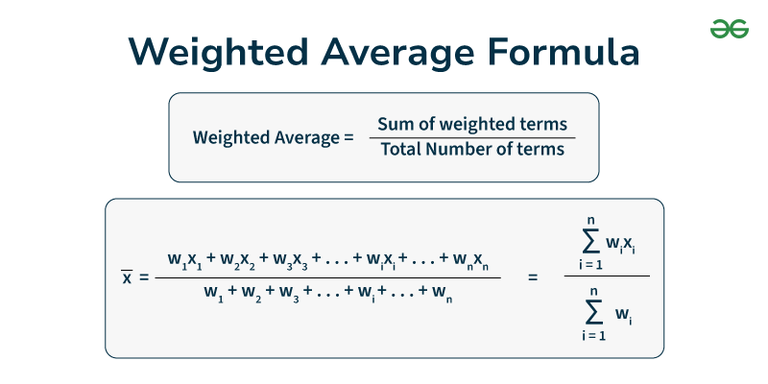

In [75]:
from sklearn.neighbors import NearestNeighbors
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(X)

,n_neighbors,5
,radius,1.0
,algorithm,'brute'
,leaf_size,30
,metric,'cosine'
,p,2
,metric_params,None
,n_jobs,None


In [76]:
def get_similar_users_knn(user_id, user_mapper, user_inv_mapper, knn_model, k):
    user_index = user_mapper[user_id]
    distances, indices = knn_model.kneighbors(X_train[user_index], n_neighbors=k+1)
    similar_users = indices.flatten()[1:]
    return similar_users

In [77]:
def recommend_movies(user_id , X,user_similarity,user_mapper , user_inv_mapper,movie_inv_mapper,k,n_recommendations):
    
    user_index = user_mapper[user_id]

    top_k_similar_users = get_similar_users(user_id,user_mapper,user_inv_mapper,user_similarity,k)  #top k similar user ids
    
    #top_k_similar_users = get_similar_users_knn(user_id,user_mapper,user_inv_mapper,knn_model,k)  #top k similar user ids
    top_k_sim_scores = user_similarity[user_index][top_k_similar_users]
    
    X_k = X[top_k_similar_users].toarray()
    weighted_sum = top_k_sim_scores @ X_k
    normalization = np.array([np.abs(top_k_sim_scores).sum()] * X.shape[1] )
    predicted_ratings = weighted_sum / normalization
    #print(np.sort(predicted_ratings)[::-1][:n_recommendations])

    user_ratings = X[user_index].toarray().flatten()
    predicted_ratings[user_ratings > 0] = 0

    top_movies_idx = np.argsort(predicted_ratings)[::-1][:n_recommendations]
    recommend_movies_ids = [movie_inv_mapper[i] for i in top_movies_idx]
    return recommend_movies_ids

In [78]:
data_merged[data_merged['item_id'].isin(recommend_movies(10, X_train, user_similarity, user_mapper, user_inv_mapper, movie_inv_mapper,5,5))].groupby('title')['rating'].mean().sort_values()

title
Mr. Holland's Opus (1995)                 3.710383
This Is Spinal Tap (1984)                 3.898204
Alien (1979)                              4.029661
One Flew Over the Cuckoo's Nest (1975)    4.291262
Schindler's List (1993)                   4.464602
Name: rating, dtype: float64

#### evaluation using precision@k

In [79]:
test_matrix

item_id,1,4,7,8,9,11,12,13,14,15,...,690,692,732,739,742,748,751,763,845,1028
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
938,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
def mean_precision_at_k(test_matrix , X_train, user_similarity,user_mapper , user_inv_mapper,movie_inv_mapper,k,n_recommendations):
    precisions = []
    for user_id in test_matrix.index:
        recommended_movies = recommend_movies(user_id,X_train,user_similarity,user_mapper,user_inv_mapper,movie_inv_mapper,k,n_recommendations)
            
        relevant_items = test_matrix.loc[user_id]
        relevant_items = relevant_items[relevant_items > 0].index.tolist()
        #print("recommend_movies : ",recommended_movies)
        #print("relevant : ",relevant_items)
        correct = len(set(recommended_movies) & set(relevant_items))
        precision = correct / n_recommendations
        #print("precision : ",precision)
        precisions.append(precision)
    return precisions    


In [81]:
precisions =  mean_precision_at_k(test_matrix , X_train, user_similarity,user_mapper , user_inv_mapper,movie_inv_mapper,k=50,n_recommendations=10)
mean_precision = sum(precisions)/len(precisions)
print("mean Test precisions : ",mean_precision)

mean Test precisions :  0.451338199513382


actually , it's not a bad result at all using this technique
 - also this means that out of of 10 movies we recommended to the user about 5 of them were >=4 rating for him

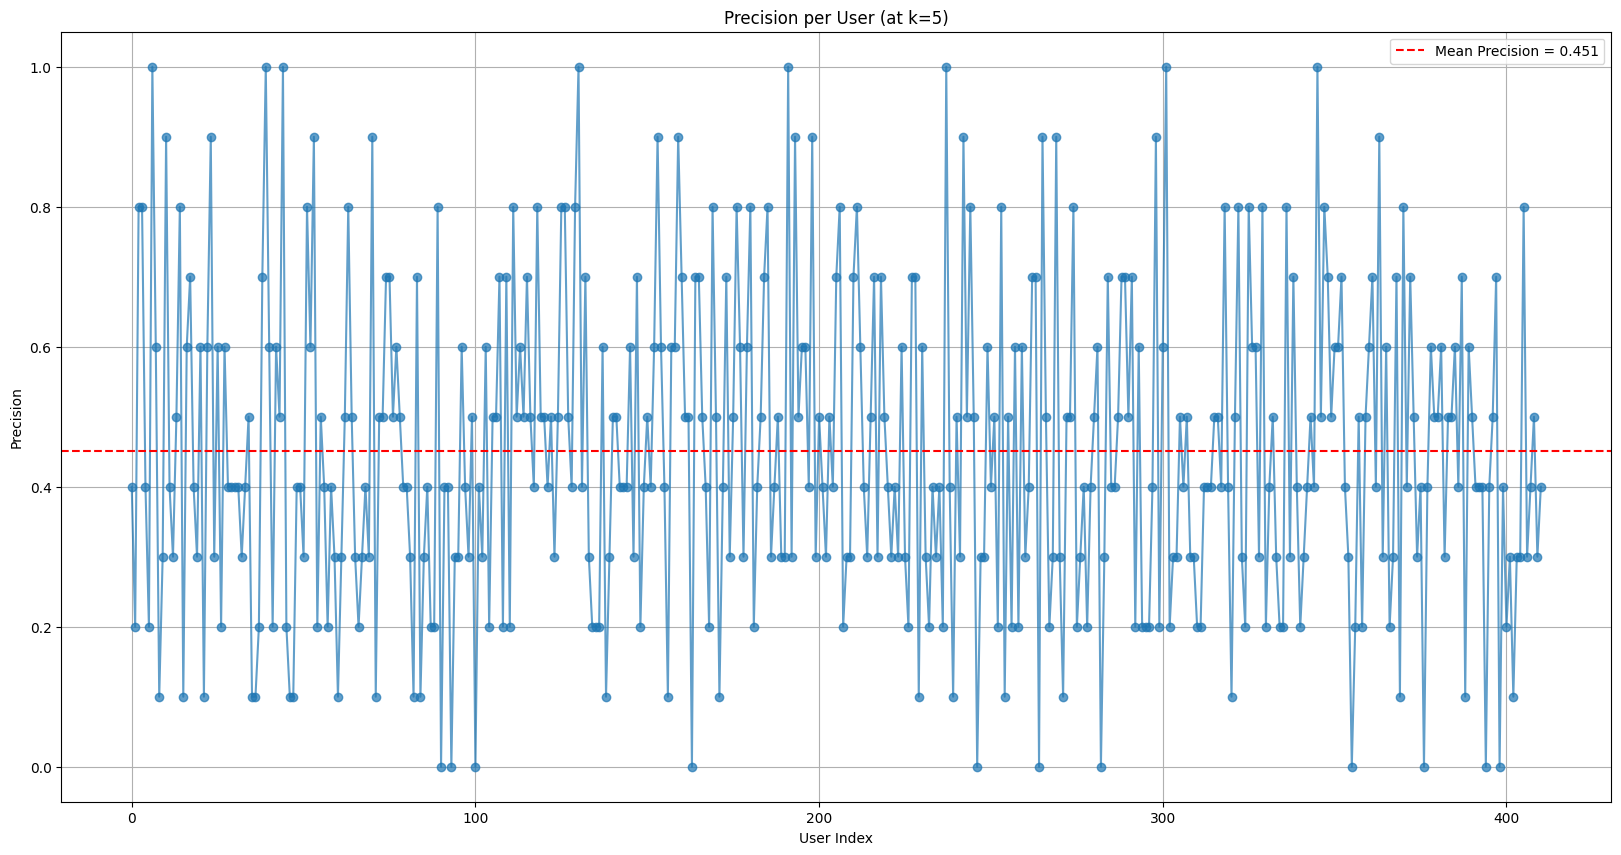

In [82]:
plt.figure(figsize=(20,10))
plt.plot(range(len(precisions)), precisions, marker='o', linestyle='-', alpha=0.7)
plt.axhline(mean_precision, color='r', linestyle='--', label=f'Mean Precision = {mean_precision:.3f}')
plt.title('Precision per User (at k=5)')
plt.xlabel('User Index')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

### 3.Item-Based Collabritive filtering

In [83]:
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(train_matrix.T)

,n_neighbors,5
,radius,1.0
,algorithm,'brute'
,leaf_size,30
,metric,'cosine'
,p,2
,metric_params,None
,n_jobs,None


In [84]:
def find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, k):


    X = X.T
    neighbour_ids = []
    
    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]

    if isinstance(movie_vec, (np.ndarray)):
        movie_vec = movie_vec.reshape(1,-1)

    # use k+1 since kNN output includes the movieId of interest
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric='cosine')
    kNN.fit(X)
    neighbour = kNN.kneighbors(movie_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(movie_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [85]:
movie_titles = dict(zip(movies['item_id'], movies['title']))

movie_id = 1

similar_movies = find_similar_movies(movie_id, X_train, movie_mapper, movie_inv_mapper, k=10)
movie_title = movie_titles[movie_id]

print(f"Because you watched {movie_title}:")
for i in similar_movies:
    print(movie_titles[i])

Because you watched Toy Story (1995):
Star Wars (1977)
Star Trek: First Contact (1996)
Empire Strikes Back, The (1980)
Apollo 13 (1995)
Raiders of the Lost Ark (1981)
Return of the Jedi (1983)
Independence Day (ID4) (1996)
Silence of the Lambs, The (1991)
Indiana Jones and the Last Crusade (1989)


this function handles movie_id , not the title , we need a method to get movie_id from movie title
 - using a lib called : "fuzzywuzzy" using Levenshtein distance algorithms it computes the number of changed needed to convert some word to another
 - we can use it to compute the similarity between 2 words

In [86]:
from fuzzywuzzy import process

In [87]:
def match_movie_name(movie_name):
    all_movie_titles = movies['title'].tolist()
    nearest_title = process.extractOne(movie_name,all_movie_titles)
    return nearest_title[0]

to convert from title into id :

In [88]:
data_merged

,user_id,item_id,rating,title
0,186,302,3,L.A. Confidential (1997)
1,298,474,4,Dr. Strangelove or: How I Learned to Stop Worr...
2,115,265,2,"Hunt for Red October, The (1990)"
3,305,451,3,Grease (1978)
4,6,86,3,"Remains of the Day, The (1993)"
...,...,...,...,...
49308,913,690,3,Seven Years in Tibet (1997)
49309,660,229,2,Star Trek III: The Search for Spock (1984)
49311,913,209,2,This Is Spinal Tap (1984)
49312,880,476,3,"First Wives Club, The (1996)"


In [89]:
title = match_movie_name('Dr. Strangelove or: How I Learned to Stop Wo')
print("full movie name : ",title)
movie_id = data_merged[data_merged['title']==title]['item_id'].values[0]
print("movie id : ",movie_id)

full movie name :  Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)
movie id :  474


In [90]:
movies[movies['item_id']==movie_id]

,item_id,title,release_date,unknown,Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating
472,474,Dr. Strangelove or: How I Learned to Stop Worr...,01-Jan-1963,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,194


In [91]:
similar_ids = find_similar_movies(movie_id, X_train, movie_mapper, movie_inv_mapper, 10)
movies[movies['item_id'].isin(similar_ids)][['item_id','title']]

,item_id,title
22,23,Taxi Driver (1976)
49,50,Star Wars (1977)
134,135,2001: A Space Odyssey (1968)
167,168,Monty Python and the Holy Grail (1974)
174,175,Brazil (1985)
179,180,Apocalypse Now (1979)
190,191,Amadeus (1984)
355,357,One Flew Over the Cuckoo's Nest (1975)
481,483,Casablanca (1942)


In [92]:
recommended_movies = find_similar_movies(movie_id, X_train, movie_mapper, movie_inv_mapper,10)
len(set(recommended_movies) & set(test_matrix[1][test_matrix[1]>=4].index))

0

In [93]:
movie_id = np.random.choice(test_matrix.T.index)
movie_id

np.int64(218)

In [94]:
def get_mean_precisions(train_matrix,test_matrix,movie_mapper,movie_inv_mapper,k):
    precisions = []
    for user_id in test_matrix.index:
        rated_movies = train_matrix.loc[user_id]
        rated_movies = rated_movies[rated_movies>=4].index
        if len(rated_movies) > 0 :
            movie_id = np.random.choice(rated_movies)

        recommended_movies = find_similar_movies(movie_id, X_train, movie_mapper, movie_inv_mapper,k)

        liked = test_matrix.loc[user_id][test_matrix.loc[user_id] >= 4].index
        correct = len(set(recommended_movies) & set(liked))
        precision = correct / k
        precisions.append(precision)
    return precisions           


In [95]:

precisions = get_mean_precisions(train_matrix,test_matrix,movie_mapper,movie_inv_mapper,10)
mean_precision = np.mean(precisions)
print("mean precisions : ",mean_precision)

mean precisions :  0.08029197080291971


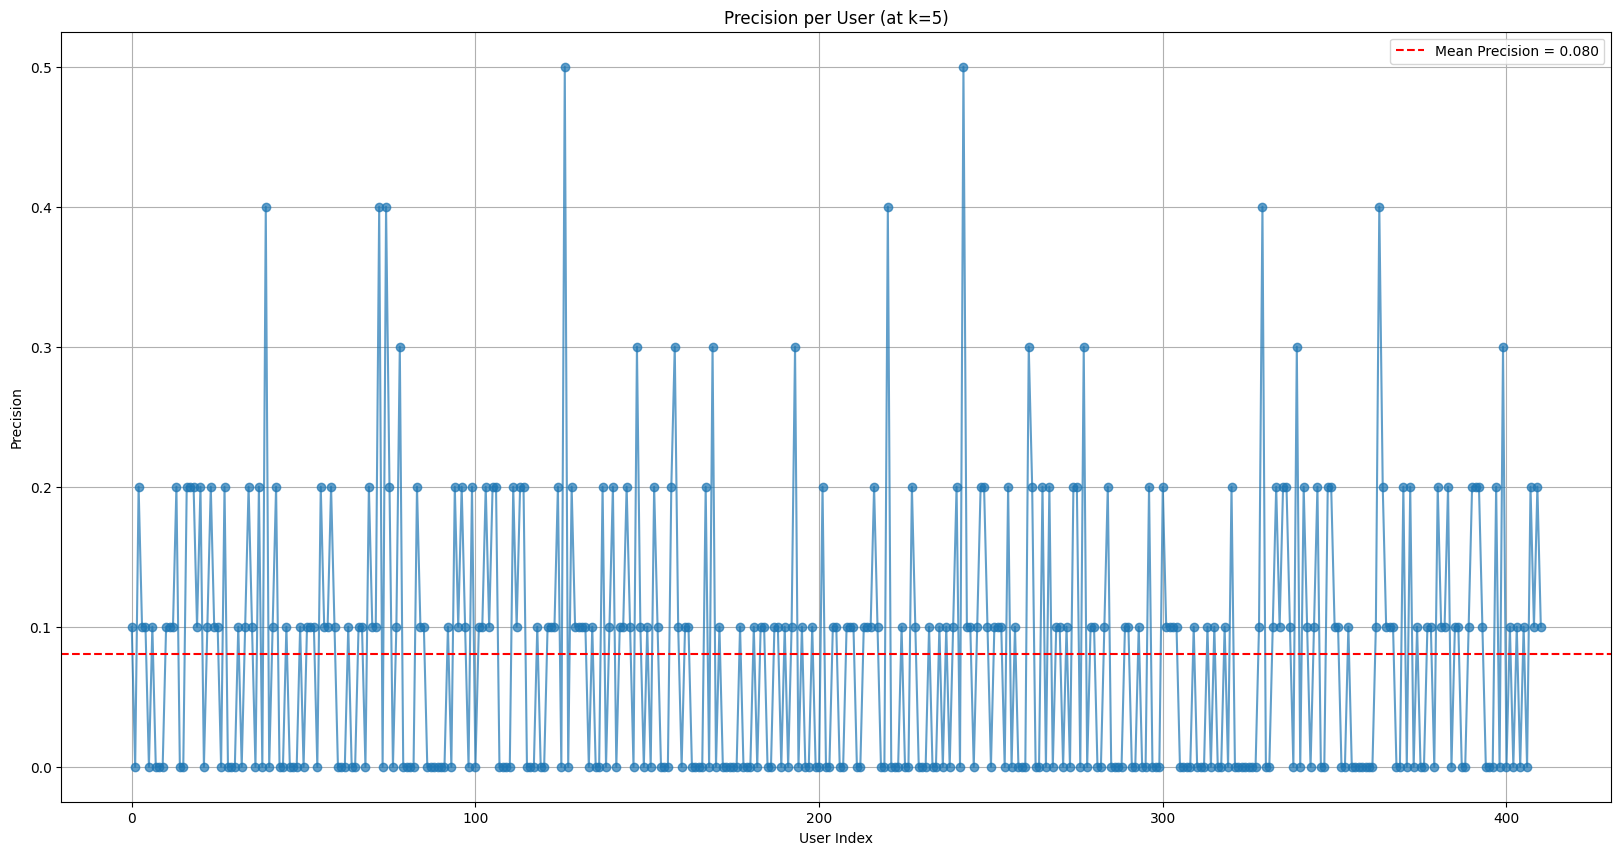

In [96]:
plt.figure(figsize=(20,10))
plt.plot(range(len(precisions)), precisions, marker='o', linestyle='-', alpha=0.7)
plt.axhline(mean_precision, color='r', linestyle='--', label=f'Mean Precision = {mean_precision:.3f}')
plt.title('Precision per User (at k=5)')
plt.xlabel('User Index')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

### this file covered 3 main techniques for recommendation sys : 
1. simple methond using weighted_sum >> used as a cold start for users with no hisroty
2. user-based collaborative filtering using item-matrix , cosine simlarity and KNN
3. item-based collaboration filltering 

### next and more advanced step using marix-factorization (SVD) and using deep learning and embedding techniques